In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split as tts, GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.linear_model import RidgeClassifier, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import f1_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler,RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.over_sampling import ADASYN,SMOTE


import warnings
from time import time
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv('train.csv') 

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [52]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [53]:
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [54]:
len(df)

45528

In [55]:
df.apply(lambda x:x.nunique())

customer_id                45528
name                        4010
age                           33
gender                         3
owns_car                       2
owns_house                     2
no_of_children                10
net_yearly_income          45502
no_of_days_employed         7874
occupation_type               19
total_family_members          10
migrant_worker                 2
yearly_debt_payments       45251
credit_limit               45371
credit_limit_used(%)         100
credit_score                 450
prev_defaults                  3
default_in_last_6months        2
credit_card_default            2
dtype: int64


<img src="info.png" style="height:95%">

In [56]:
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [57]:
df1= df.copy()
df1[cat_cols] = OrdinalEncoder().fit_transform(df1[cat_cols])

In [58]:
df1.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,0.0,0.0,1.0,0.0,107934.04,612.0,17.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,1.0,0.0,1.0,0.0,109862.62,2771.0,8.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,1.0,0.0,1.0,0.0,230153.17,204.0,8.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,0.0,0.0,1.0,0.0,122325.82,11941.0,3.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,1.0,1.0,1.0,0.0,387286.00,1459.0,3.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


<AxesSubplot:>

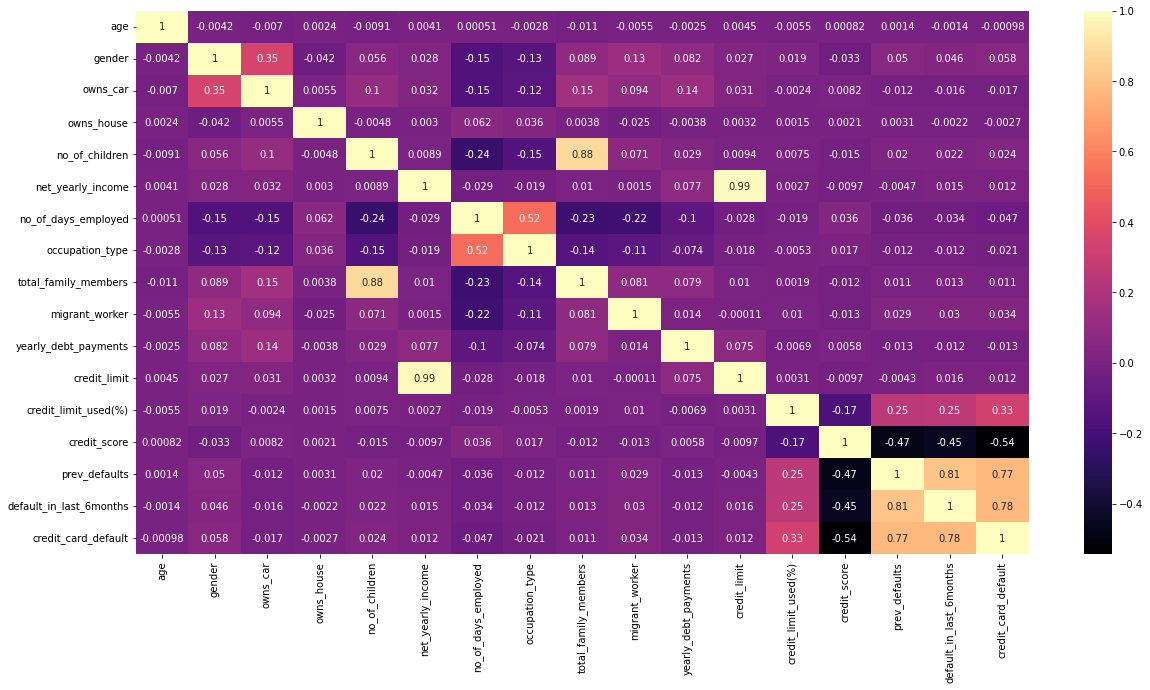

In [59]:
plt.figure(figsize=(20,10))

sns.heatmap(df1.corr(),cmap='magma',annot=True)

In [60]:
all_features = ['age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'migrant_worker', 'yearly_debt_payments', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months']

In [61]:
df.columns

Index(['customer_id', 'name', 'age', 'gender', 'owns_car', 'owns_house',
       'no_of_children', 'net_yearly_income', 'no_of_days_employed',
       'occupation_type', 'total_family_members', 'migrant_worker',
       'yearly_debt_payments', 'credit_limit', 'credit_limit_used(%)',
       'credit_score', 'prev_defaults', 'default_in_last_6months',
       'credit_card_default'],
      dtype='object')

In [64]:
cat_cols = [x for x in all_features if df[all_features][x].dtype == "object"]

num_cols = [x for x in all_features if df[all_features][x].dtype in ['int64', 'float64']]


In [65]:
cat_cols


['gender', 'owns_car', 'owns_house', 'occupation_type']

In [66]:
num_cols

['age',
 'no_of_children',
 'net_yearly_income',
 'no_of_days_employed',
 'migrant_worker',
 'yearly_debt_payments',
 'credit_limit_used(%)',
 'credit_score',
 'prev_defaults',
 'default_in_last_6months']

In [67]:
X = df[all_features]
             
y = df[['credit_card_default']]

In [68]:
X.apply(lambda x:x.isna().sum()/len(X))

age                        0.000000
gender                     0.000000
owns_car                   0.012015
owns_house                 0.000000
no_of_children             0.017001
net_yearly_income          0.000000
no_of_days_employed        0.010170
occupation_type            0.000000
migrant_worker             0.001911
yearly_debt_payments       0.002087
credit_limit_used(%)       0.000000
credit_score               0.000176
prev_defaults              0.000000
default_in_last_6months    0.000000
dtype: float64

In [69]:
y.value_counts(normalize=True)

credit_card_default
0                      0.918797
1                      0.081203
dtype: float64

In [71]:

cat_t = Pipeline([('simp',SimpleImputer(strategy='most_frequent')),('OH',OneHotEncoder())])
num_t_SI = SimpleImputer(strategy='median')
pre= ColumnTransformer([('num',num_t_SI,num_cols),('cat',cat_t,cat_cols)])

t = time()
model2 = ExtraTreesClassifier(bootstrap=False, criterion="entropy", max_features=0.6000000000000001, min_samples_leaf=1, min_samples_split=16, n_estimators=100)

pipe = Pipeline(steps=[('prepro',pre),('model',model2)])
pipe.fit(X,y)
t1 = time()



In [72]:
print('total time ',t1-t) 

total time  7.274342775344849


In [73]:
pipe.score(X,y)

0.9930372518010895

In [42]:
test = pd.read_csv('test.csv')
testx = test[all_features]
pred = pipe.predict(testx)


In [43]:
pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [44]:
sub = pd.DataFrame()

In [45]:
sub['customer_id'] = test['customer_id']

In [46]:
sub['credit_card_default'] = pred

In [47]:
sub.to_csv("sub4.csv",index=False)